# Exploratory Data Analysis

Author: Gabriele Gabrielli

Date: 2024 - 06 - 30

## Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#import seaborn as sns
#import scipy.stats as ss
#import numpy as np
#import statsmodels

# import prince, 
# import survival



## Data import 

### Calendar

listing_id (int): id dell'immobile (o dell'annuncio)

date (string > datetime): data delle informazioni per l'immobile

available (string > boolean): se l'immobile è disponibile per la data della riga (valori: f,t)

price (string > float):  costo per giorno per l'immobile

adjusted_price: solo nans, da rimuovere RIMUOVERE

minimum_nights (float > int): minimo di notti prenotabile

maximum_nights (float > int): massimo di notti prenotabile

In [2]:
#df_cal = pd.read_csv('calendar.csv', header=0, sep=',', quotechar='"') # LOCAL
df_cal = pd.read_csv('calendar.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') # DEEPNOTE
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6400,2023-12-19,f,$100.00,NaN,4.0,5.0
1,6400,2023-12-20,f,$100.00,NaN,4.0,5.0
2,6400,2023-12-21,f,$100.00,NaN,4.0,5.0
3,6400,2023-12-22,f,$100.00,NaN,4.0,5.0
4,6400,2023-12-23,f,$100.00,NaN,4.0,5.0


In [3]:
df_cal.count()

listing_id        9103730
date              9103730
available         9103730
price             9103730
adjusted_price          0
minimum_nights    9103729
maximum_nights    9103729
dtype: int64

In [4]:
cols_to_keep = ['listing_id', 'date', 'available', 'price']
df_cal = df_cal[cols_to_keep]
# df_cal.head()

#### Cleaning

In [5]:
# variable price from string to float
df_cal['price'] = df_cal['price'].apply(lambda x : float(x.replace('$','').replace(',','')))


In [6]:

# variable available fro string to binary
df_cal['available'] = df_cal['available'].map({'f': 0, 't': 1})


In [7]:
# Convert the 'date' column to datetime format
df_cal['date'] = pd.to_datetime(df_cal['date'])


### Listing

id (int): id dell'immobile (non ci sono duplicati)

listing_url (string - url): link all'annuncio RIMUOVERE

scape_id (int): id dello scraping

last_scraped (string > datetime): ??? se ci sono stati due scraping sono registrati entrambi o solo l'ultimo? come impatta questa cosa?

source (string): fonte dello scraping (20k sono "city scrape", 4.6k sono "previous scrape")

name (string): descrizione breve dell'immobile - si possono estrarre alcuni dati

description: solo nans, da rimuovere RIMUOVERE

neighborhood_overview (string): testo molto lungo che descrive la zona, se necessario va processato con nlp RIMUOVERE

picture_url (string -url): link a immagine RIMUOVERE

host_id (int): id del proprietario RIMUOVERE

host_url (string - url): link al profilo del proprietario RIMUOVERE

host_name (string): nome del proprietario RIMUOVERE

host_since (string > datetime): data da quanto il proprietario pubblica sulla piattaforma MODIFICARE IN ANNI DI ANZIANITà / RIMUOVERE

host_location (string): nome della città: FILTRARE E TENERE SOLO QUELLI SU MILANO?

host_about (string): testo molto lungo che descrive il proprietario, RIMUOVERE

host_response_time (string): categorico per dire entro quanto risponde il proprietario RIMUOVERE

host_response_rate (float): percentuale di risposta dal proprietario RIMUOVERE

host_acceptance_rate (float): percentuale di inquilini accettati dal proprietario RIMUOVERE

host_is_superhost (string > boolean): se il proprietario ha un certo status RIMUOVERE

host_thumbnail_url: RIMUOVERE

host_picture_url: RIMUOVERE

host_neighborhood: RIMUOVERE

host_listings_count: ????? quante altri annunci ha il proprietario ????

host_verifications (string): lista di categorie per cui il proprietario è stato verificato RIMUOVERE

host_has_profile_pic (string - url): RIMUOVERE

host_verifications (stirng > bool): se il proprietario è verificato (qui si potrebbe filtrare solo su quelli verificati)

neighborhood (string): il quartiere inserito, molti Nans RIMUOVERE

neighborhood_cleansed (string): categorico, molto utile (87 categorie)

neighbourhood_group_cleansed: tutti Nans, RIMUOVERE

latitude (float):

longitude (float):

property_type (string): categorical, could be used for filtering (53 types)

room_type (stirng):  categorical, could be used for filtering (4 types)

accomodates (int): how many people can spend the night in the property (max is 16)

beds (int)

minimum_nights (int)

review_score_rating (float)

In [8]:
# df_lis = pd.read_csv('listings.csv', header=0, sep=',', quotechar='"') # LOCAL
df_lis = pd.read_csv('listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') # DEEPNOTE
df_lis.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,304050,https://www.airbnb.com/rooms/304050,20231218165007,2023-12-20,city scrape,Rental unit in Milan · ★4.91 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/4234186/e05e9...,1566887,...,4.97,4.80,4.90,NaN,f,2,1,1,0,1.92
1,6400,https://www.airbnb.com/rooms/6400,20231218165007,2023-12-19,city scrape,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,NaN,The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,...,5.00,4.56,4.67,NaN,f,1,0,1,0,0.06
2,23986,https://www.airbnb.com/rooms/23986,20231218165007,2023-12-19,city scrape,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,...,4.73,4.69,4.46,NaN,f,1,1,0,0,0.18
3,309905,https://www.airbnb.com/rooms/309905,20231218165007,2023-12-19,city scrape,Rental unit in Milan · ★4.90 · 2 bedrooms · 3 ...,NaN,NaN,https://a0.muscache.com/pictures/4088248/415c2...,1593809,...,4.94,4.46,4.65,NaN,f,2,2,0,0,0.37
4,24107,https://www.airbnb.com/rooms/24107,20231218165007,2023-12-19,city scrape,Condo in Milan · ★4.50 · 1 bedroom · 6 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/cd4112f3-37c2...,46951,...,5.00,3.67,4.67,NaN,f,1,1,0,0,0.02


In [9]:
cols_to_keep = ['id','listing_url',  'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'beds', 
       'minimum_nights', 'review_scores_rating','availability_30','availability_90','availability_365']
df_lis = df_lis[cols_to_keep]
#df_lis.head()

## Preprocessing

### Merge

In [10]:
df = pd.merge(df_cal, df_lis, left_on='listing_id', right_on='id', how='left')
del df_cal, df_lis # saving ram

### IDs removal

In [11]:
ids_to_be_removed = [573805563697496967]
df = df[df.id != 573805563697496967]

### New features

In [12]:
df.head(1000)

,listing_id,date,available,price,id,listing_url,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,minimum_nights,review_scores_rating,availability_30,availability_90,availability_365
0,6400,2023-12-19,0,100.0,6400,https://www.airbnb.com/rooms/6400,TIBALDI,45.44119,9.17813,Private room,1,1.0,4,4.89,23,83,358
1,6400,2023-12-20,0,100.0,6400,https://www.airbnb.com/rooms/6400,TIBALDI,45.44119,9.17813,Private room,1,1.0,4,4.89,23,83,358
2,6400,2023-12-21,0,100.0,6400,https://www.airbnb.com/rooms/6400,TIBALDI,45.44119,9.17813,Private room,1,1.0,4,4.89,23,83,358
3,6400,2023-12-22,0,100.0,6400,https://www.airbnb.com/rooms/6400,TIBALDI,45.44119,9.17813,Private room,1,1.0,4,4.89,23,83,358
4,6400,2023-12-23,0,100.0,6400,https://www.airbnb.com/rooms/6400,TIBALDI,45.44119,9.17813,Private room,1,1.0,4,4.89,23,83,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,309905,2024-09-08,1,200.0,309905,https://www.airbnb.com/rooms/309905,TICINESE,45.44383,9.17860,Entire home/apt,4,3.0,20,4.90,0,17,292
996,309905,2024-09-09,1,200.0,309905,https://www.airbnb.com/rooms/309905,TICINESE,45.44383,9.17860,Entire home/apt,4,3.0,20,4.90,0,17,292
997,309905,2024-09-10,1,200.0,309905,https://www.airbnb.com/rooms/309905,TICINESE,45.44383,9.17860,Entire home/apt,4,3.0,20,4.90,0,17,292
998,309905,2024-09-11,1,200.0,309905,https://www.airbnb.com/rooms/309905,TICINESE,45.44383,9.17860,Entire home/apt,4,3.0,20,4.90,0,17,292


In [13]:
import pandas as pd
from tqdm import tqdm

def describe_listings(df):
    # Group by listing_id
    grouped = df.groupby('listing_id')
    
    # Prepare empty list to store results
    descriptions = []
    
    # Iterate through groups with tqdm progress bar
    for listing_id, group in tqdm(grouped, desc="Processing listings"):
        # Apply describe to the group
        desc = group.select_dtypes(include=['number']).describe()
        
        # Reset index to make stat a column
        desc = desc.reset_index()
        desc = desc.rename(columns={'index': 'stat'})
        
        # Add listing_id column
        desc['listing_id'] = listing_id
        
        # Append to results list
        descriptions.append(desc)
    
    # Concatenate all results
    result = pd.concat(descriptions, ignore_index=True)
    
    return result

# Assuming your dataframe is named df
result = describe_listings(df)

# Display the first few rows of the result
print(result.head(20))

# To get a summary for a specific listing_id
# listing_id = 6400  # Replace with the desired listing_id
# print(result[result['listing_id'] == listing_id])

Processing listings: 100%|██████████| 24935/24935 [05:43<00:00, 72.54it/s]


     stat  listing_id   available  price       id      latitude     longitude  \
0   count        6400  365.000000  365.0    365.0  3.650000e+02  3.650000e+02   
1    mean        6400    0.980822  100.0   6400.0  4.544119e+01  9.178130e+00   
2     std        6400    0.137339    0.0      0.0  7.115181e-15  1.778795e-15   
3     min        6400    0.000000  100.0   6400.0  4.544119e+01  9.178130e+00   
4     25%        6400    1.000000  100.0   6400.0  4.544119e+01  9.178130e+00   
5     50%        6400    1.000000  100.0   6400.0  4.544119e+01  9.178130e+00   
6     75%        6400    1.000000  100.0   6400.0  4.544119e+01  9.178130e+00   
7     max        6400    1.000000  100.0   6400.0  4.544119e+01  9.178130e+00   
8   count       23986  365.000000  365.0    365.0  3.650000e+02  3.650000e+02   
9    mean       23986    0.983562  150.0  23986.0  4.544806e+01  9.173730e+00   
10    std       23986    0.127329    0.0      0.0  7.115181e-15  0.000000e+00   
11    min       23986    0.0

In [14]:
result[result['stat'] == 'std'].sort_values('available', ascending=False)[['listing_id','available']]

,listing_id,available
11418,5353091,0.500684
147842,856343210046195213,0.500684
117978,684748863522070068,0.500684
23730,11508597,0.500684
126426,746129200701123424,0.500684
...,...,...
57058,32352584,0.000000
57066,32352725,0.000000
57074,32352852,0.000000
57082,32353713,0.000000


In [15]:
df['earnings'] = df['price'] * df['available']

In [16]:
df['id'].unique().astype(str)[0:100]

array(['6400', '304050', '309905', '312428', '317024', '329995', '333223',
       '335766', '341076', '344373', '344791', '348448', '364897',
       '365083', '367858', '370033', '374326', '375429', '375710',
       '379677', '381512', '383918', '385378', '386235', '387543',
       '390076', '391334', '392296', '392515', '392891', '394443',
       '396939', '397875', '399142', '399879', '400300', '402406',
       '402422', '403578', '404938', '405061', '405089', '406218',
       '406353', '409123', '409414', '409509', '409985', '410480',
       '411118', '412833', '413624', '414465', '414550', '415534',
       '416072', '416539', '417903', '418415', '419218', '420988',
       '421430', '423437', '425205', '426809', '427820', '430409',
       '430860', '431719', '432325', '432373', '434334', '434379',
       '434834', '440465', '451086', '451490', '460175', '996360',
       '462229', '466141', '470014', '470276', '470284', '470295',
       '472998', '473121', '478445', '494968', '496359

<Axes: >

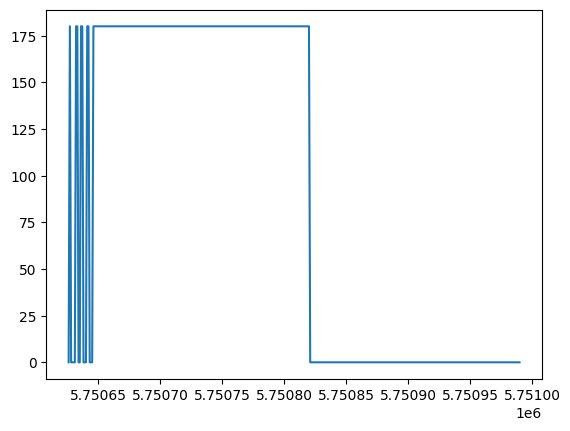

In [17]:
filtered_df = df[df['id'] == 746129200701123424] 
filtered_df['earnings'].plot()

## Visualization

Text(0.5, 1.0, 'Average Availability per Neighborhood')

C:\Users\apuza\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 133 (\x85) missing from current font.
  func(*args, **kwargs)
C:\Users\apuza\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


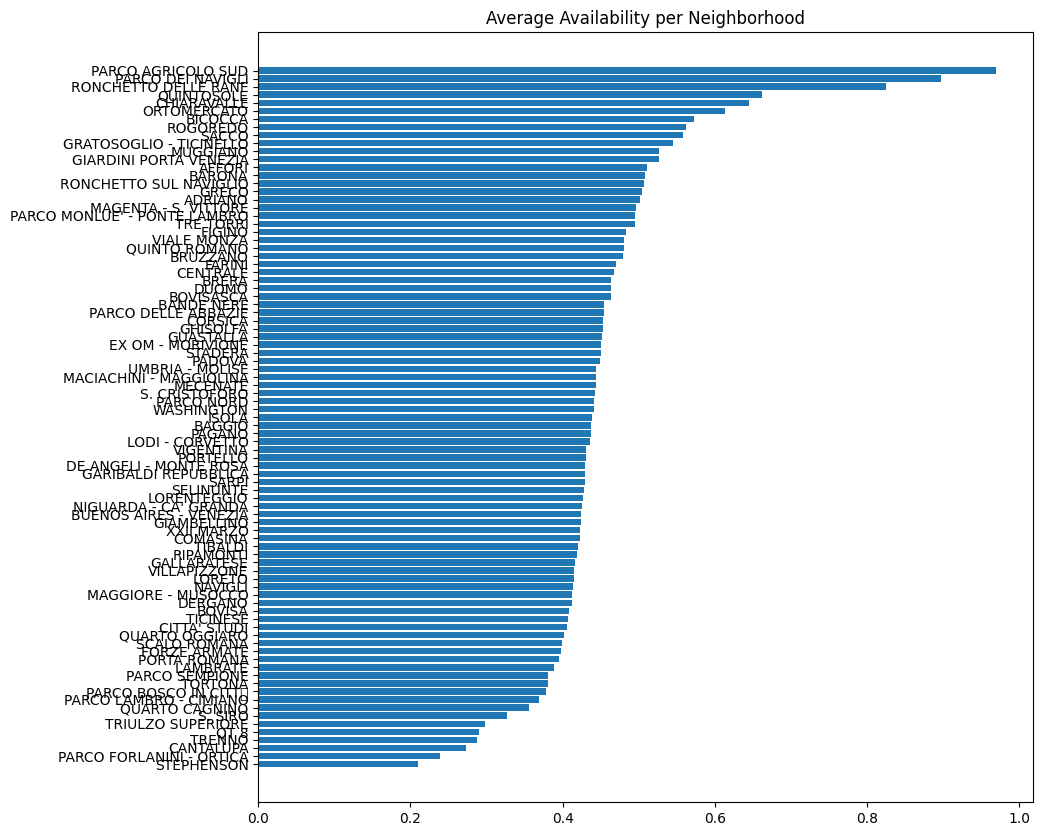

In [18]:
grouped =df.groupby(['neighbourhood_cleansed'])\
        .agg({ "available": "mean",  "price": "mean"})\
        .reset_index()\
        .sort_values('available', ascending=True)
        
fig, ax = plt.subplots(figsize = (10,10))
        
ax.barh(grouped['neighbourhood_cleansed'], grouped['available'])
ax.set_title('Average Availability per Neighborhood')



Text(0.5, 1.0, 'Average Price per Neighborhood')

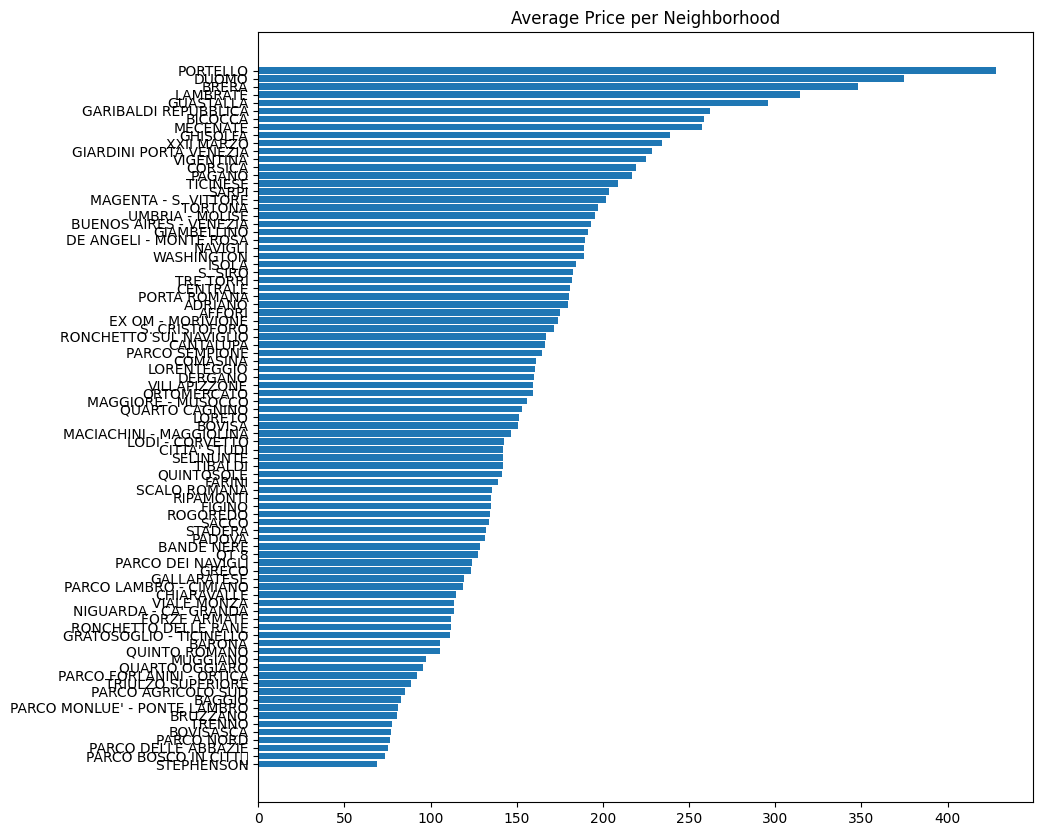

In [19]:
grouped = grouped.sort_values('price', ascending=True)
        
fig, ax = plt.subplots(figsize = (10,10))
        
ax.barh(grouped['neighbourhood_cleansed'], grouped['price'])
ax.set_title('Average Price per Neighborhood')

# ATTENZIONE AI DATI SPORCHI

In [20]:
df[df.neighbourhood_cleansed == 'PORTELLO'].describe()

,listing_id,date,available,price,id,latitude,longitude,accommodates,beds,minimum_nights,review_scores_rating,availability_30,availability_90,availability_365,earnings
count,4.747400e+04,47474,47474.000000,47474.000000,4.747400e+04,47474.000000,47474.000000,47474.000000,47474.000000,47474.000000,37619.000000,47474.000000,47474.000000,47474.000000,47474.000000
mean,4.684854e+17,2024-06-17 11:27:10.821080832,0.430783,428.294456,4.684854e+17,45.485498,9.154914,3.223112,1.861461,1.845958,4.683531,11.524940,42.586152,137.130640,191.708009
min,2.519773e+06,2023-12-18 00:00:00,0.000000,40.000000,2.519773e+06,45.480519,9.145032,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.639353e+07,2024-03-18 00:00:00,0.000000,85.000000,2.639353e+07,45.484110,9.152074,2.000000,1.000000,1.000000,4.610000,0.000000,0.000000,0.000000,0.000000
50%,6.404248e+17,2024-06-17 00:00:00,0.000000,120.000000,6.404248e+17,45.485861,9.155649,3.000000,2.000000,2.000000,4.840000,9.000000,50.000000,129.000000,0.000000
75%,9.028252e+17,2024-09-17 00:00:00,1.000000,200.000000,9.028252e+17,45.486788,9.156962,4.000000,2.000000,2.000000,5.000000,24.000000,81.000000,242.000000,120.000000
max,1.045604e+18,2024-12-18 00:00:00,1.000000,8999.000000,1.045604e+18,45.489780,9.163107,7.000000,5.000000,7.000000,5.000000,30.000000,90.000000,365.000000,8999.000000
std,4.431588e+17,NaN,0.495191,1290.615943,4.431588e+17,0.002040,0.003463,1.325827,0.838932,0.972268,0.412985,11.767749,37.250386,130.162629,910.902861


In [21]:
df[(df.neighbourhood_cleansed == 'PORTELLO') & (df.price > 5000)]

,listing_id,date,available,price,id,listing_url,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,minimum_nights,review_scores_rating,availability_30,availability_90,availability_365,earnings
7884723,949064557620245636,2023-12-19,0,8999.0,949064557620245636,https://www.airbnb.com/rooms/949064557620245636,PORTELLO,45.486280,9.157580,Entire home/apt,7,4.0,1,4.77,0,0,0,0.0
7884724,949064557620245636,2023-12-20,1,8999.0,949064557620245636,https://www.airbnb.com/rooms/949064557620245636,PORTELLO,45.486280,9.157580,Entire home/apt,7,4.0,1,4.77,0,0,0,8999.0
7884725,949064557620245636,2023-12-21,1,8999.0,949064557620245636,https://www.airbnb.com/rooms/949064557620245636,PORTELLO,45.486280,9.157580,Entire home/apt,7,4.0,1,4.77,0,0,0,8999.0
7884726,949064557620245636,2023-12-22,0,8999.0,949064557620245636,https://www.airbnb.com/rooms/949064557620245636,PORTELLO,45.486280,9.157580,Entire home/apt,7,4.0,1,4.77,0,0,0,0.0
7884727,949064557620245636,2023-12-23,0,8999.0,949064557620245636,https://www.airbnb.com/rooms/949064557620245636,PORTELLO,45.486280,9.157580,Entire home/apt,7,4.0,1,4.77,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086639,969499394342012338,2024-12-12,0,6000.0,969499394342012338,https://www.airbnb.com/rooms/969499394342012338,PORTELLO,45.486747,9.150386,Entire home/apt,4,3.0,1,NaN,23,23,23,0.0
8086640,969499394342012338,2024-12-13,0,6000.0,969499394342012338,https://www.airbnb.com/rooms/969499394342012338,PORTELLO,45.486747,9.150386,Entire home/apt,4,3.0,1,NaN,23,23,23,0.0
8086641,969499394342012338,2024-12-14,0,6000.0,969499394342012338,https://www.airbnb.com/rooms/969499394342012338,PORTELLO,45.486747,9.150386,Entire home/apt,4,3.0,1,NaN,23,23,23,0.0
8086642,969499394342012338,2024-12-15,0,6000.0,969499394342012338,https://www.airbnb.com/rooms/969499394342012338,PORTELLO,45.486747,9.150386,Entire home/apt,4,3.0,1,NaN,23,23,23,0.0


In [22]:
df.date.min()

Timestamp('2023-12-18 00:00:00')

In [23]:
df.groupby(['date', 'neighbourhood_cleansed'])['price'].unstack()

AttributeError: 'SeriesGroupBy' object has no attribute 'unstack'

/var/folders/w_/kqymfxcs5d561j515w6_cfqh0000gn/T/ipykernel_3119/4197618686.py:19: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()
/var/folders/w_/kqymfxcs5d561j515w6_cfqh0000gn/T/ipykernel_3119/4197618686.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/Users/gabrielegabrielli/Library/Caches/pypoetry/virtualenvs/neural-networks-_F4AaA2c-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


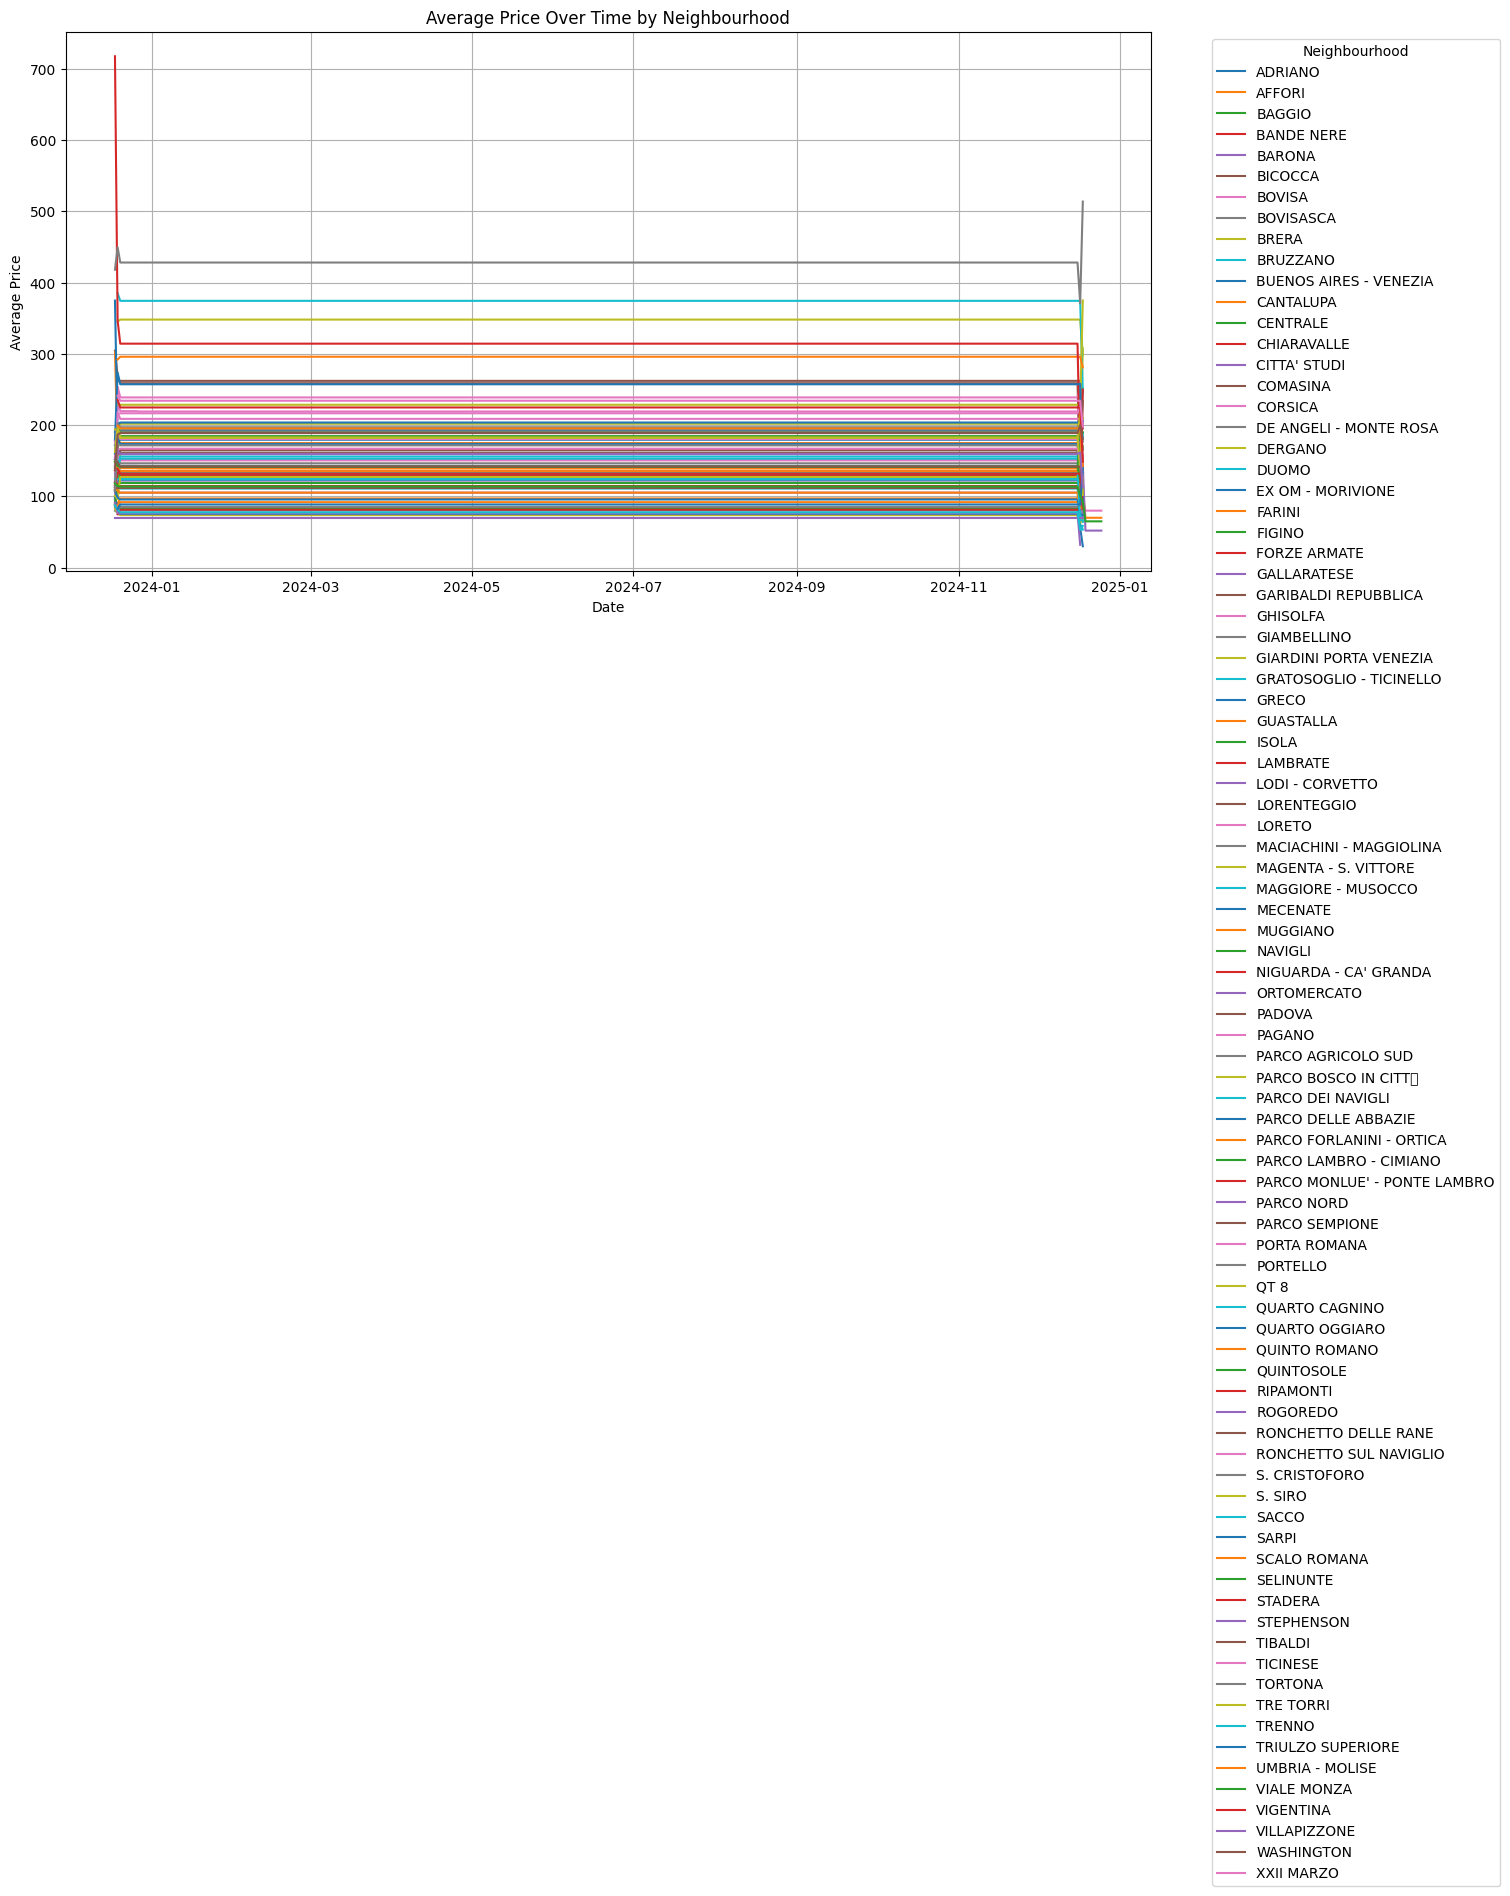

In [ ]:
# Supponiamo che il tuo dataframe si chiami df
# Convertiamo la colonna 'date' in un formato datetime
#df['date'] = pd.to_datetime(df['date'])

# Raggruppiamo per 'neighbourhood_cleansed' e 'date' e calcoliamo la media dei prezzi
grouped = df.groupby(['date', 'neighbourhood_cleansed'])['price'].mean().unstack()

# Tracciamo il grafico
plt.figure(figsize=(14, 7))
for neighbourhood in grouped.columns:
    plt.plot(grouped.index, grouped[neighbourhood], label=neighbourhood)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time by Neighbourhood')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostriamo il grafico
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76f04f32-913f-4e06-977f-6259b3823110' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>